In [23]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr # you might need to install this (see above)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# don't copy and paste these lists and number in several places 
# (which is what the original "simple program" did... that's bad programming!)
# instead, create a var - if we change it here, it changes everywhere
stocks = ['AAPL','MSFT','VZ']
start_yr = 2000

# load
stock_prices = pdr.get_data_yahoo(stocks, start=start_yr)
stock_prices = stock_prices.filter(like='Adj Close') # reduce to just columns with this in the name
stock_prices.columns = stocks # put their tickers as column names
stock_prices # print




,AAPL,MSFT,VZ
Date,,,
2000-01-03,3.470226,37.495686,20.721500
2000-01-04,3.177650,36.229057,20.051672
2000-01-05,3.224152,36.611080,20.721500
2000-01-06,2.945139,35.384666,20.631170
2000-01-07,3.084645,35.847076,20.478834
2000-01-10,3.030393,36.108448,20.370028
2000-01-11,2.875386,35.183617,20.179594
2000-01-12,2.702940,34.037640,19.499504
2000-01-13,2.999391,34.680992,19.347162


In [24]:
stock_prices.stack().swaplevel().sort_index().reset_index()

,level_0,Date,0
0,AAPL,2000-01-03,3.470226
1,AAPL,2000-01-04,3.177650
2,AAPL,2000-01-05,3.224152
3,AAPL,2000-01-06,2.945139
4,AAPL,2000-01-07,3.084645
5,AAPL,2000-01-10,3.030393
6,AAPL,2000-01-11,2.875386
7,AAPL,2000-01-12,2.702940
8,AAPL,2000-01-13,2.999391
9,AAPL,2000-01-14,3.113708


In [25]:
# this is wide data... so if we want to create a new variable, we have to do it once for each firm...
# what if we have 1000 firms? seems tough to do...
# make long/tidy:
stock_prices = stock_prices.stack().swaplevel().sort_index().reset_index()
stock_prices.columns = ['Firm','Date','Adj Close']
stock_prices # print - now that is formatted nicely, like CRSP! 

# note: we might have to tweak the regression section of "Simple Program"
# to work with the long data, but I suspect that it would be shorter code and 
# more "generally applicable" (ie easily work with N=1000+ firms)

,Firm,Date,Adj Close
0,AAPL,2000-01-03,3.470226
1,AAPL,2000-01-04,3.177650
2,AAPL,2000-01-05,3.224152
3,AAPL,2000-01-06,2.945139
4,AAPL,2000-01-07,3.084645
5,AAPL,2000-01-10,3.030393
6,AAPL,2000-01-11,2.875386
7,AAPL,2000-01-12,2.702940
8,AAPL,2000-01-13,2.999391
9,AAPL,2000-01-14,3.113708


In [26]:
stock_prices['ret'] = stock_prices.groupby('Firm')['Adj Close'].pct_change()
stock_prices

,Firm,Date,Adj Close,ret
0,AAPL,2000-01-03,3.470226,NaN
1,AAPL,2000-01-04,3.177650,-0.084310
2,AAPL,2000-01-05,3.224152,0.014634
3,AAPL,2000-01-06,2.945139,-0.086538
4,AAPL,2000-01-07,3.084645,0.047368
5,AAPL,2000-01-10,3.030393,-0.017588
6,AAPL,2000-01-11,2.875386,-0.051151
7,AAPL,2000-01-12,2.702940,-0.059973
8,AAPL,2000-01-13,2.999391,0.109678
9,AAPL,2000-01-14,3.113708,0.038113


In [30]:
stock_prices.count()

Firm         15183
Date         15183
Adj Close    15183
ret          15180
dtype: int64

In [37]:
stock_prices.groupby('Firm')['ret'].describe()

,count,mean,std,min,25%,50%,75%,max
Firm,,,,,,,,
AAPL,5060.0,0.001234,0.025352,-0.518692,-0.010326,0.000899,0.012946,0.139049
MSFT,5060.0,0.000494,0.018967,-0.155977,-0.008045,0.000337,0.008933,0.195652
VZ,5060.0,0.000323,0.015350,-0.118461,-0.007238,0.000395,0.007704,0.146324


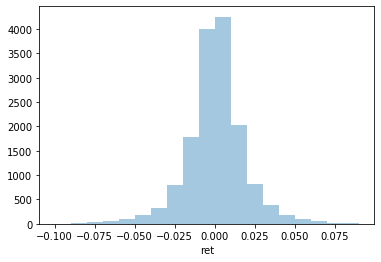

In [38]:
sns.distplot(stock_prices['ret'],kde=False, 
             bins=np.arange(-0.1,0.1,0.01).tolist())

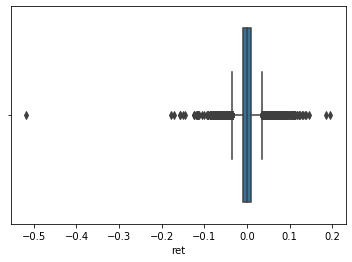

In [40]:
sns.boxplot(stock_prices['ret'])

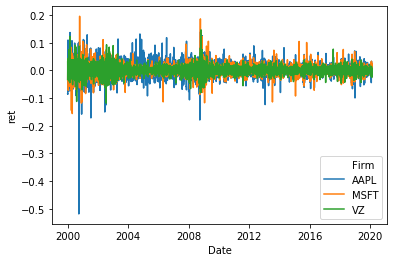

In [27]:
sns.lineplot(data=stock_prices, x='Date', y='ret',hue='Firm')

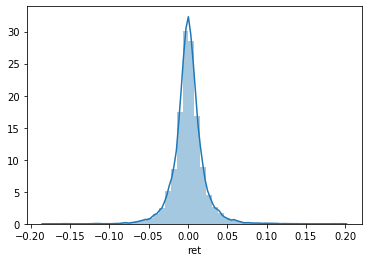

In [10]:

sns.distplot(stock_prices.query('abs(ret) < 0.3')['ret'])

In [37]:
monthly = stock_prices.groupby('Firm').resample('M', on='Date').mean()
monthly
#sns.lineplot(data=monthly, x='Date', y='ret',hue='Firm')

Adj Close       ret
Firm Date                           
AAPL 2000-01-31   3.204291 -0.002534
     2000-02-29   3.460950  0.005533
     2000-03-31   3.983771  0.008686
     2000-04-30   3.816443 -0.003572
     2000-05-31   3.125268 -0.016957
     2000-06-30   3.044572  0.010986
     2000-07-31   3.333238 -0.000553
     2000-08-31   3.181483  0.008248
     2000-09-30   3.457002 -0.031240
     2000-10-31   1.275640 -0.011274
     2000-11-30   1.211917 -0.007328
     2000-12-31   0.928106 -0.004133
     2001-01-31   1.142994  0.019131
     2001-02-28   1.217215 -0.008316
     2001-03-31   1.286687  0.009600
     2001-04-30   1.408582  0.008608
     2001-05-31   1.459013 -0.010632
     2001-06-30   1.334982  0.007848
     2001-07-31   1.330730 -0.008669
     2001-08-31   1.156139 -0.000322
     2001-09-30   1.029372 -0.011249
     2001-10-31   1.074025  0.005993
     2001-11-30   1.218298  0.009683
     2001-12-31   1.345153  0.001830
     2002-01-31   1.401679  0.006307
     2002-02-28   1.476779 -0.006186
     2002-03-31   1.503106  0.004648
     2002-04-30   1.522763  0.001412
     2002-05-31   1.495228 -0.001304
     2002-06-30   1.212622 -0.012766
...                    ...       ...
VZ   2017-09-30  43.150936  0.001614
     2017-10-31  44.192209 -0.000940
     2017-11-30  42.141685  0.003025
     2017-12-31  47.451905  0.002015
     2018-01-31  48.312280  0.001606
     2018-02-28  45.650410 -0.006373
     2018-03-31  44.098646  0.000110
     2018-04-30  44.863010  0.002241
     2018-05-31  44.592797 -0.001498
     2018-06-30  45.242814  0.002658
     2018-07-31  48.013355  0.001826
     2018-08-31  50.322626  0.002268
     2018-09-30  50.726322 -0.000910
     2018-10-31  52.200596  0.003500
     2018-11-30  55.823147  0.002671
     2018-12-31  53.579813 -0.003548
     2019-01-31  54.194111 -0.000398
     2019-02-28  52.895322  0.001779
     2019-03-31  55.641837  0.001878
     2019-04-30  56.163674 -0.001061
     2019-05-31  55.676898 -0.002229
     2019-06-30  55.540710  0.002572
     2019-07-31  55.622638 -0.000965
     2019-08-31  55.165900  0.002354
     2019-09-30  58.497208  0.001877
     2019-10-31  59.375428  0.000560
     2019-11-30  59.101431 -0.000169
     2019-12-31  60.442404  0.000931
     2020-01-31  59.685212 -0.001026
     2020-02-29  58.831363 -0.002188

[726 rows x 2 columns]